In [1]:
age <- read.csv("age.csv")
str(age)

'data.frame':	58 obs. of  2 variables:
 $ Date : Factor w/ 58 levels "1960-12-31","1961-12-31",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Value: num  493850 466675 405599 351177 294407 ...


In [2]:
age.ts <- ts(age$Value, start=c(1960), frequency=1)
str(age.ts)

 Time-Series [1:58] from 1960 to 2017: 493850 466675 405599 351177 294407 ...


Warning message:
"package 'forecast' was built under R version 3.4.4"

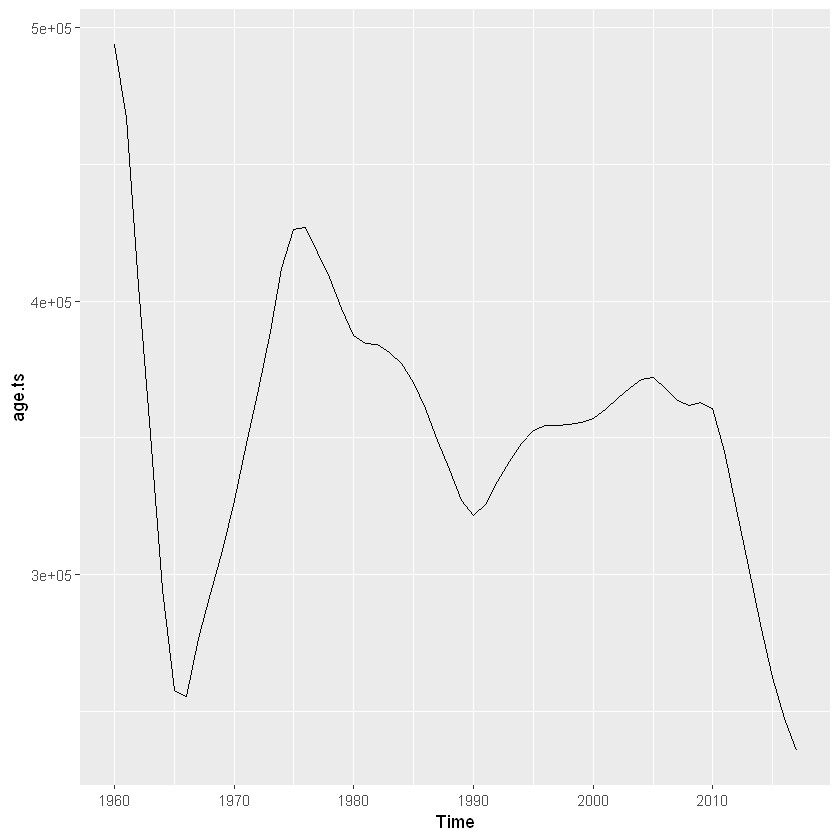

In [3]:
library(forecast)
autoplot(age.ts)

In [4]:
age.train <- window(age.ts, start=c(1960), end=c(2007))
str(age.train)

 Time-Series [1:48] from 1960 to 2007: 493850 466675 405599 351177 294407 ...


     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       359228.6 352971.3 365485.9 349658.9 368798.4
2009       356463.8 339798.2 373129.4 330976.0 381951.7
2010       357698.1 329185.7 386210.5 314092.1 401304.1
2011       363513.7 323010.2 404017.2 301568.9 425458.5
2012       367555.8 316177.7 418933.9 288979.8 446131.8
2013       368978.7 311572.2 426385.1 281183.1 456774.2
2014       367807.6 308770.0 426845.3 277517.4 458097.9
2015       364791.2 305817.9 423764.4 274599.4 454983.0
2016       361073.8 301339.5 420808.1 269718.0 452429.6
2017       357811.1 296116.4 419505.8 263457.2 452165.0


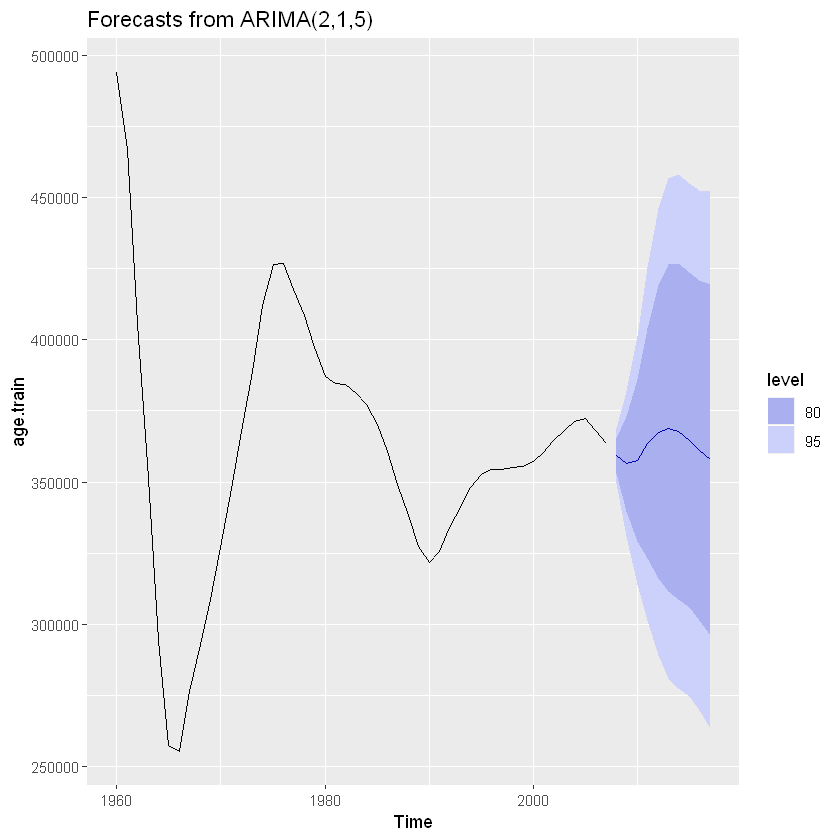

In [5]:
age.best.model <- arima(age.train, order=c(2, 1, 5))
age.fcast <- forecast(age.best.model)
print(age.fcast)
autoplot(age.fcast)

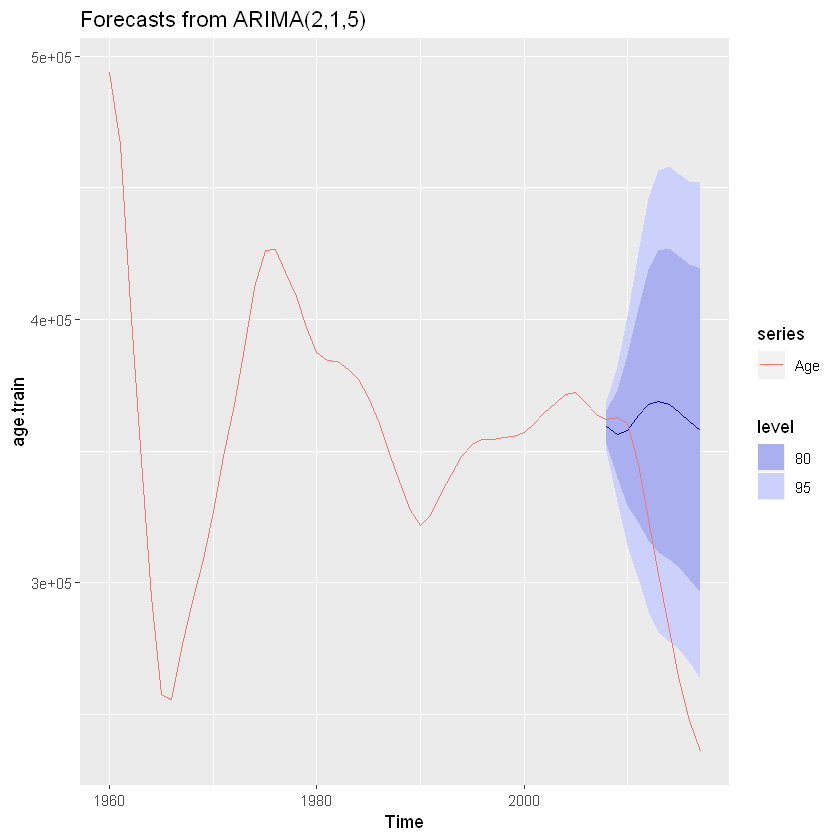

In [6]:
autoplot(age.fcast) + autolayer(age.ts, series="Age")